In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import warnings 
warnings.filterwarnings('ignore')
import seaborn as sns
%matplotlib inline

Here we uploaded all the realivent libaries 

In [2]:
df_obese = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")

we loaded the data set

In [3]:
df_obese.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


head.() alows us to see the first 5 rows of the data set

In [4]:
mapping = {'yes': 1, 'no': 0}

df_obese['family_history_with_overweight'] = df_obese['family_history_with_overweight'].map(mapping)

df_obese["family_history_with_overweight"].describe


<bound method NDFrame.describe of 0       1
1       1
2       1
3       0
4       0
       ..
2106    1
2107    1
2108    1
2109    1
2110    1
Name: family_history_with_overweight, Length: 2111, dtype: int64>

I mapped "family_history_with_overweight" from Yes/No to 1/0

In [5]:
mapping = {'yes': 1, 'no': 0}

df_obese['SMOKE'] = df_obese['SMOKE'].map(mapping)



I mapped "SMOKE" from Yes/No to 1/0

In [6]:
df_obese.shape

(2111, 17)

In [7]:
df_obese.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

No null values

In [8]:
df_obese.describe()

,Age,Height,Weight,family_history_with_overweight,FCVC,NCP,SMOKE,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,0.817622,2.419043,2.685628,0.020843,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.386247,0.533927,0.778039,0.142893,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,1.000000,2.000000,2.658738,0.000000,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,1.000000,2.385502,3.000000,0.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,1.000000,3.000000,3.000000,0.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,1.000000,3.000000,4.000000,1.000000,3.000000,3.000000,2.000000


looked for differences between mean and 50%

In [9]:
columns_to_keep = ['Age', 'Height', 'Weight', 'family_history_with_overweight', 'SMOKE',]

df = df_obese[columns_to_keep]

print(df)


            Age    Height      Weight  family_history_with_overweight  SMOKE
0     21.000000  1.620000   64.000000                               1      0
1     21.000000  1.520000   56.000000                               1      1
2     23.000000  1.800000   77.000000                               1      0
3     27.000000  1.800000   87.000000                               0      0
4     22.000000  1.780000   89.800000                               0      0
...         ...       ...         ...                             ...    ...
2106  20.976842  1.710730  131.408528                               1      0
2107  21.982942  1.748584  133.742943                               1      0
2108  22.524036  1.752206  133.689352                               1      0
2109  24.361936  1.739450  133.346641                               1      0
2110  23.664709  1.738836  133.472641                               1      0

[2111 rows x 5 columns]


removed surplus features 

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Height                          2111 non-null   float64
 2   Weight                          2111 non-null   float64
 3   family_history_with_overweight  2111 non-null   int64  
 4   SMOKE                           2111 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 82.6 KB


In [11]:
df.drop(columns=["family_history_with_overweight"], inplace=True)

droped target column 

In [12]:
df.head()

,Age,Height,Weight,SMOKE
0,21.0,1.62,64.0,0
1,21.0,1.52,56.0,1
2,23.0,1.80,77.0,0
3,27.0,1.80,87.0,0
4,22.0,1.78,89.8,0


In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X = df[['SMOKE', 'Height', 'Weight', 'Age']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


began to scale the data and then used PCA on the remaining observations 

In [14]:
pca.components_

array([[ 0.15493823,  0.64058087,  0.70032235,  0.27422419],
       [ 0.61600883, -0.35287703, -0.08716405,  0.69886576]])

In [15]:
print(pca.explained_variance_ratio_)

[0.37716006 0.26723119]


In [16]:
0.37296997 + 0.27222384

0.64519381

In [17]:
total_var = pca.explained_variance_ratio_.sum() * 100
print(X_pca, total_var)

[[-1.33073922 -0.07061127]
 [-1.14685829  4.64630513]
 [ 0.33946993 -0.57449604]
 ...
 [ 1.5068602  -0.63483289]
 [ 1.48953651 -0.38298637]
 [ 1.45855405 -0.45788519]] 64.43912452903801


In [18]:
print("PCA components:\n{}".format(pca.components_))

PCA components:
[[ 0.15493823  0.64058087  0.70032235  0.27422419]
 [ 0.61600883 -0.35287703 -0.08716405  0.69886576]]


In [19]:
X_pca.shape

(2111, 2)

from 4 features to 2 

In [20]:
print(type(X_pca))
print(df_obese['family_history_with_overweight'].head())
X_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
X_pca_with_target = pd.concat([X_pca, df_obese['family_history_with_overweight']], axis=1)
print(X_pca_with_target)


<class 'numpy.ndarray'>
0    1
1    1
2    1
3    0
4    0
Name: family_history_with_overweight, dtype: int64
           PC1       PC2  family_history_with_overweight
0    -1.330739 -0.070611                               1
1    -1.146858  4.646305                               1
2     0.339470 -0.574496                               1
3     0.779812 -0.167169                               0
4     0.501244 -0.651601                               0
...        ...       ...                             ...
2106  1.094166 -0.640771                               1
2107  1.460033 -0.680913                               1
2108  1.506860 -0.634833                               1
2109  1.489537 -0.382986                               1
2110  1.458554 -0.457885                               1

[2111 rows x 3 columns]


Read back in the origianl target variable 

In [21]:
X_pca_with_target.head()

,PC1,PC2,family_history_with_overweight
0,-1.330739,-0.070611,1
1,-1.146858,4.646305,1
2,0.339470,-0.574496,1
3,0.779812,-0.167169,0
4,0.501244,-0.651601,0


New list of variables 

In [22]:
X_pca_with_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 3 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   PC1                             2111 non-null   float64
 1   PC2                             2111 non-null   float64
 2   family_history_with_overweight  2111 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 49.6 KB


In [23]:
X_pca_with_target.values

array([[-1.33073922, -0.07061127,  1.        ],
       [-1.14685829,  4.64630513,  1.        ],
       [ 0.33946993, -0.57449604,  1.        ],
       ...,
       [ 1.5068602 , -0.63483289,  1.        ],
       [ 1.48953651, -0.38298637,  1.        ],
       [ 1.45855405, -0.45788519,  1.        ]])

In [24]:
from sklearn.model_selection import train_test_split
X = X_pca_with_target[['PC1', 'PC2']] 
y = X_pca_with_target['family_history_with_overweight']

X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=1)


In [25]:
X_train.shape, X_validation.shape, y_train.shape, y_validation.shape

((1688, 2), (423, 2), (1688,), (423,))

split the data with a ration of 20/80. testing 20, training 80

In [26]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print(f"{name}: Mean Accuracy: {cv_results.mean()}, Std Dev: {cv_results.std()}")



LR: Mean Accuracy: 0.847175260636799, Std Dev: 0.024832377073835777
LDA: Mean Accuracy: 0.8519160326852633, Std Dev: 0.027535560694043535
KNN: Mean Accuracy: 0.861996336996337, Std Dev: 0.023982442568552868
CART: Mean Accuracy: 0.81580022541561, Std Dev: 0.026941243526852763


Cross validation, which is the best model to use 

In [27]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_validation)

In [28]:
from sklearn.metrics import accuracy_score, confusion_matrix
print(accuracy_score(y_validation, predictions))
print(confusion_matrix(y_validation, predictions))


0.8747044917257684
[[ 41  32]
 [ 21 329]]


Accuracy: 0.8963270142180095


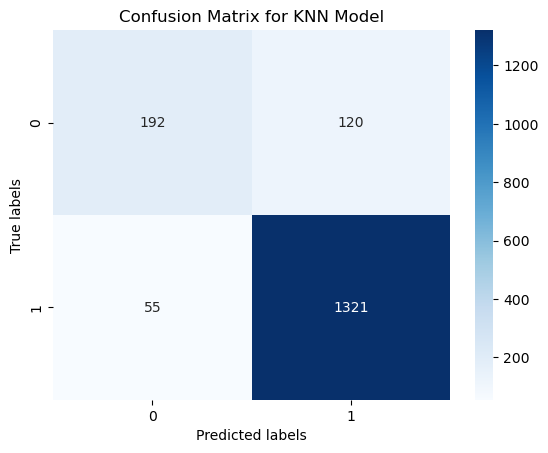

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
print("Accuracy:", accuracy)
cm = confusion_matrix(y_train, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for KNN Model')
plt.show()


KNN shows accuracy score of 89% for trining data

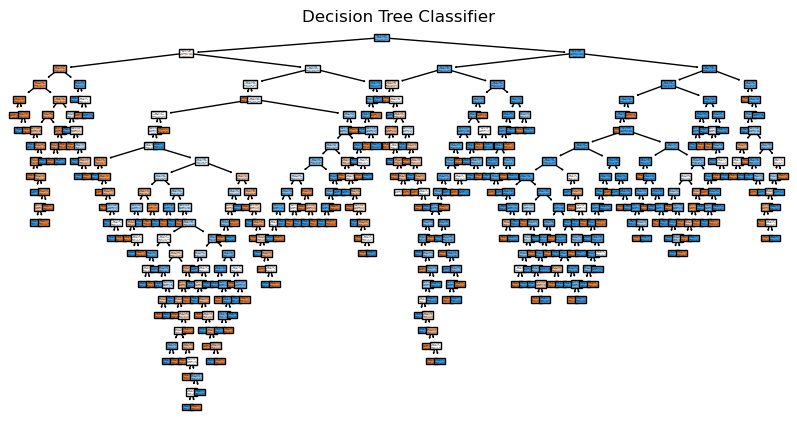

In [30]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
plt.figure(figsize=(10, 5))
plot_tree(dt_classifier, feature_names=['PC1', 'PC2'], class_names=['No', 'Yes'], filled=True)
plt.title('Decision Tree Classifier')
plt.show()


In [31]:
accuracy_train = dt_classifier.score(X_train, y_train)
print("Accuracy on Training Data:", accuracy_train)


Accuracy on Training Data: 0.9988151658767772


also used the decision tree classifer, using X_train and y_train

In [32]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             min_samples_leaf=100, 
                             
                             max_features=10,
                             n_estimators=100)

In [33]:
rfc.fit(X_train, y_train)



RandomForestClassifier(max_depth=10, max_features=10, min_samples_leaf=100)

In [34]:
predictions = rfc.predict(X_train)

In [35]:
from sklearn.metrics import classification_report,confusion_matrix

In [36]:
print(classification_report(y_train,predictions))

              precision    recall  f1-score   support

           0       0.67      0.36      0.47       312
           1       0.87      0.96      0.91      1376

    accuracy                           0.85      1688
   macro avg       0.77      0.66      0.69      1688
weighted avg       0.83      0.85      0.83      1688



here we can see the recall and weighted average score

In [37]:
print(confusion_matrix(y_train,predictions))

[[ 113  199]
 [  56 1320]]


Accuracy on Training Data: 0.8538704581358609


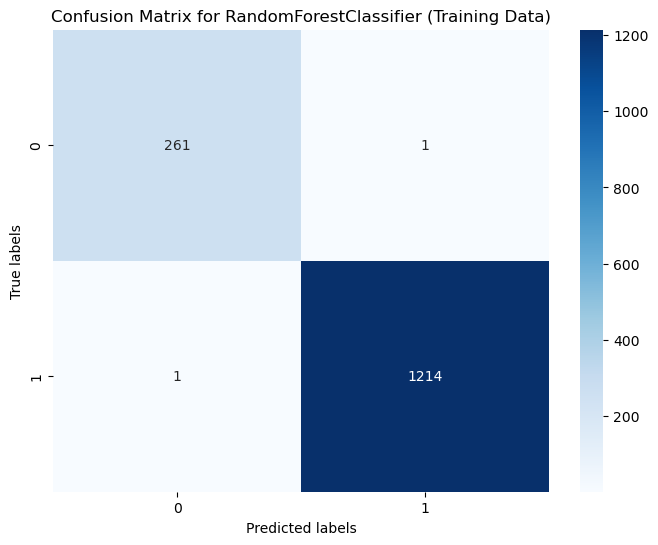

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
y_pred_train = rf_classifier.predict(X_train)
print("Accuracy on Training Data:", accuracy_train)
cm_train = confusion_matrix(y_train, y_pred_train)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for RandomForestClassifier (Training Data)')
plt.show()


Here we used the confusing matrix for training data but changed the test ration to 70/30

Accuracy on Training Data: 0.8578199052132701


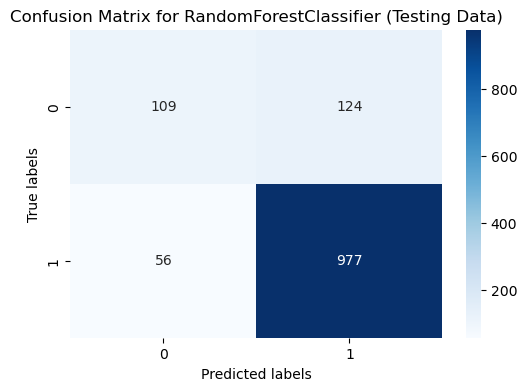

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_test, y_test)
y_pred_train = rf_classifier.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Accuracy on Training Data:", accuracy_train)
cm_train = confusion_matrix(y_train, y_pred_train)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for RandomForestClassifier (Testing Data)')
plt.show()

testing data using 60/40

In [54]:
from sklearn.model_selection import GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf_classifier = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_test, y_test)
print("Best Parameters:", grid_search.best_params_)
best_rf = grid_search.best_estimator_
y_pred_test = best_rf.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Accuracy on Test Data:", accuracy_test)


Best Parameters: {'max_depth': 30, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}
Accuracy on Test Data: 0.9069400630914827


In [55]:
print("Accuracy on Test Data:", accuracy_test)

Accuracy on Test Data: 0.9069400630914827
